In [12]:
# read parquet file
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
df = pd.read_parquet("../data/vehicle_reg_dosm/cars_2018-2025_cleaned.parquet")
print(df.shape)
print(df['maker'].unique())

(4862776, 8)
['BMW' 'Ford' 'Honda' 'Mazda' 'Mercedes Benz' 'Mitsubishi' 'Perodua'
 'Toyota' 'Volkswagen' 'Audi' 'Foton' 'Hyundai' 'Isuzu' 'Land Rover'
 'Mini' 'Nissan' 'Porsche' 'Proton' 'Renault' 'Subaru' 'Volvo' 'Chery'
 'Daihatsu' 'Jaguar' 'Tata' 'Infiniti' 'BYD' 'Peugeot' 'Kia' 'GAC' 'Xpeng'
 'JMC']


In [14]:
def classify_brand(brand):
    if brand in ['BMW', 'Mercedes Benz', 'Audi', 'Jaguar', 'Land Rover', 'Volvo', 'Porsche', 'Infiniti', 'Mini']:
        return 'Luxury'
    elif brand in ['Honda', 'Toyota', 'Nissan', 'Mazda', 'Hyundai', 'Kia', 'Ford', 'Mitsubishi', 'Peugeot']:
        return 'Mass Market'
    elif brand in ['Proton', 'Perodua']:
        return 'National'
    elif brand in ['BYD', 'Chery', 'Xpeng', 'GAC', 'JMC']:
        return 'New Entrant / EV'
    elif brand in ['Isuzu', 'Tata', 'Foton']:
        return 'Commercial'
    else:
        return 'Other'

df['Segment'] = df['maker'].apply(classify_brand)
df


,date_reg,type,maker,model,colour,fuel,state,company,Segment
0,2018-01-01,jip,BMW,X5,white,petrol,Rakan Niaga,Sime Darby Berhad,Luxury
1,2018-01-01,pick_up,Ford,Ranger,white,greendiesel,Kelantan,Sime Darby Berhad,Mass Market
2,2018-01-01,pick_up,Ford,Ranger,black,greendiesel,Kelantan,Sime Darby Berhad,Mass Market
3,2018-01-01,jip,Honda,CR-V,green,petrol,Rakan Niaga,DRB-HICOM Berhad,Mass Market
4,2018-01-01,jip,Honda,CR-V,grey,petrol,Rakan Niaga,DRB-HICOM Berhad,Mass Market
...,...,...,...,...,...,...,...,...,...
4862771,2025-03-31,motokar,Proton,Saga,white,petrol,Rakan Niaga,DRB-HICOM Berhad,National
4862772,2025-03-31,jip,Proton,X50,grey,petrol,Rakan Niaga,DRB-HICOM Berhad,National
4862773,2025-03-31,jip,Proton,X70,blue,petrol,Rakan Niaga,DRB-HICOM Berhad,National
4862774,2025-03-31,jip,Toyota,Corolla Cross,blue,petrol,Rakan Niaga,Sime UMW Holdings Berhad,Mass Market


Group data by month and Segment

In [ ]:
# Group date_reg by month and segment
df['date_reg'] = pd.to_datetime(df['date_reg'])
df['month'] = df['date_reg'].dt.to_period('M')
df_grouped = df.groupby(['month', 'Segment']).size().reset_index(name='count')
df_grouped

df['quarter'] = df['date_reg'].dt.to_period('Q')
df_grouped_quarter = df.groupby(['quarter', 'Segment']).size().reset_index(name='count')

df_grouped_quarter shape: (169, 3)


,quarter,Segment,count
0,2018Q1,Commercial,1230
1,2018Q1,Luxury,7795
2,2018Q1,Mass Market,55804
3,2018Q1,National,68410
4,2018Q1,New Entrant / EV,3
...,...,...,...
95,2022Q1,New Entrant / EV,1
96,2022Q1,Other,1700
97,2022Q2,Commercial,2279
98,2022Q2,Luxury,9245


In [33]:
macro_data_df = pd.read_csv("../data/macro_data_merged.csv")
macro_data_df

# group lf, lf employed and lf unemployed by quarter
macro_data_df['quarter'] = pd.to_datetime(macro_data_df['date']).dt.to_period('Q')
macro_data_grouped = macro_data_df.groupby('quarter').agg({
    'lf': 'mean',
    'lf_employed': 'mean',
    'lf_unemployed': 'mean',
}).reset_index()
macro_data_grouped

,quarter,lf,lf_employed,lf_unemployed
0,2018Q1,15219.400000,14708.166667,511.233333
1,2018Q2,15349.866667,14839.633333,510.200000
2,2018Q3,15421.766667,14901.800000,520.000000
3,2018Q4,15469.200000,14954.800000,514.433333
4,2019Q1,15536.100000,15018.266667,517.766667
5,2019Q2,15637.100000,15115.633333,521.500000
6,2019Q3,15720.600000,15198.500000,522.133333
7,2019Q4,15803.200000,15288.866667,514.333333
8,2020Q1,15847.333333,15298.166667,549.133333
9,2020Q2,15729.900000,14937.166667,792.700000


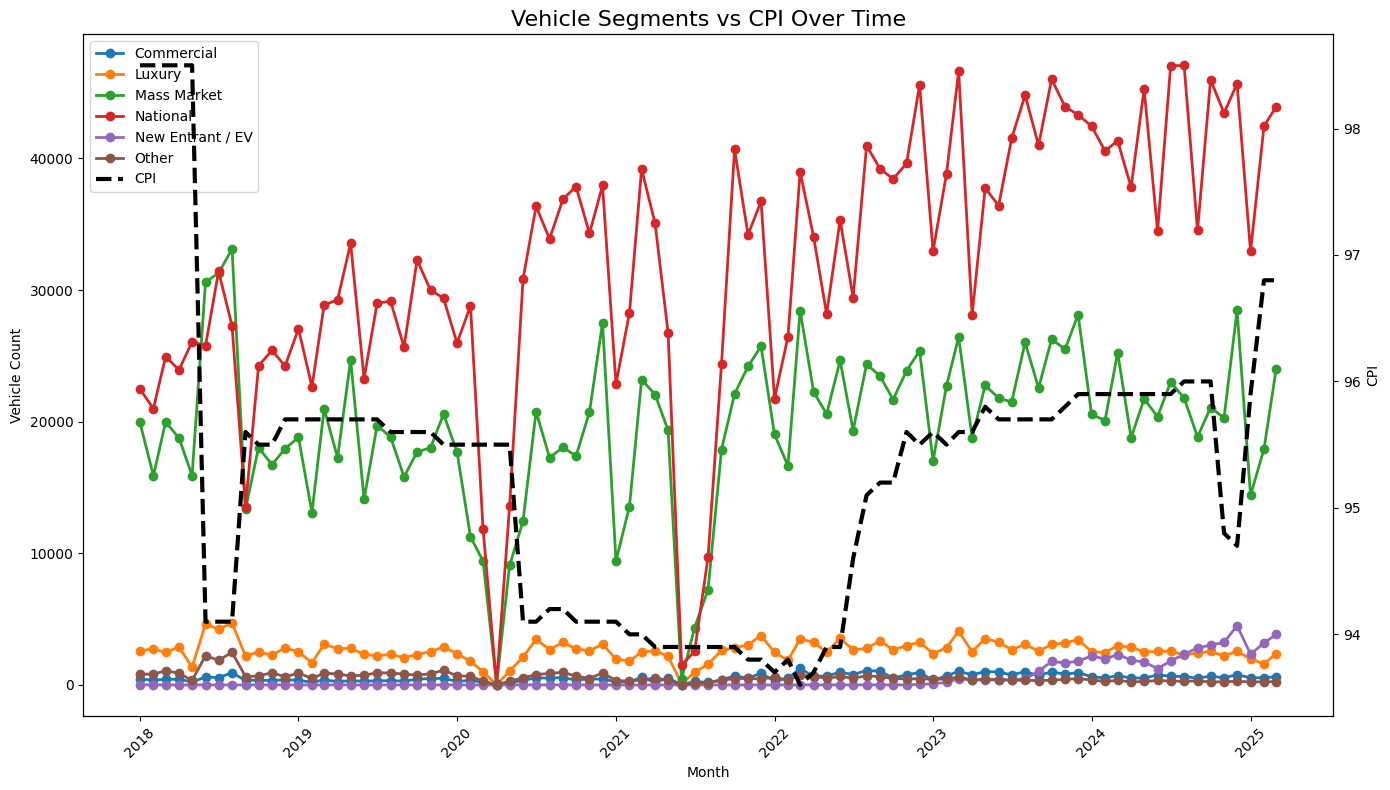

In [17]:
# plot graph cpi vs segment

# Convert month to datetime for proper plotting and merging
df_grouped['month_str'] = df_grouped['month'].astype(str)
df_grouped['month_date'] = pd.to_datetime(df_grouped['month_str'])

# Convert macro data date to datetime 
macro_data_df['date'] = pd.to_datetime(macro_data_df['date'])

# Create a pivot table to have segments as columns
pivot_df = df_grouped.pivot_table(index='month_date', columns='Segment', values='count', fill_value=0)

# Merge with CPI data
# Assuming 'Date' is the date column in macro_data_df and 'CPI' is the CPI column
merged_df = pd.merge_asof(
    pivot_df.reset_index().sort_values('month_date'),
    macro_data_df[['date', 'cars_cpi']].sort_values('date'),
    left_on='month_date',
    right_on='date',
    direction='nearest'
)

# Set up the figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot segment counts
for segment in pivot_df.columns:
    ax1.plot(merged_df['month_date'], merged_df[segment], marker='o', linewidth=2, label=segment)

ax1.set_xlabel('Month')
ax1.set_ylabel('Vehicle Count')
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for CPI
ax2 = ax1.twinx()
ax2.plot(merged_df['month_date'], merged_df['cars_cpi'], color='black', linestyle='--', linewidth=3, label='CPI')
ax2.set_ylabel('CPI', color='black')

# Add title and legend
plt.title('Vehicle Segments vs CPI Over Time', fontsize=16)
fig.tight_layout()

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


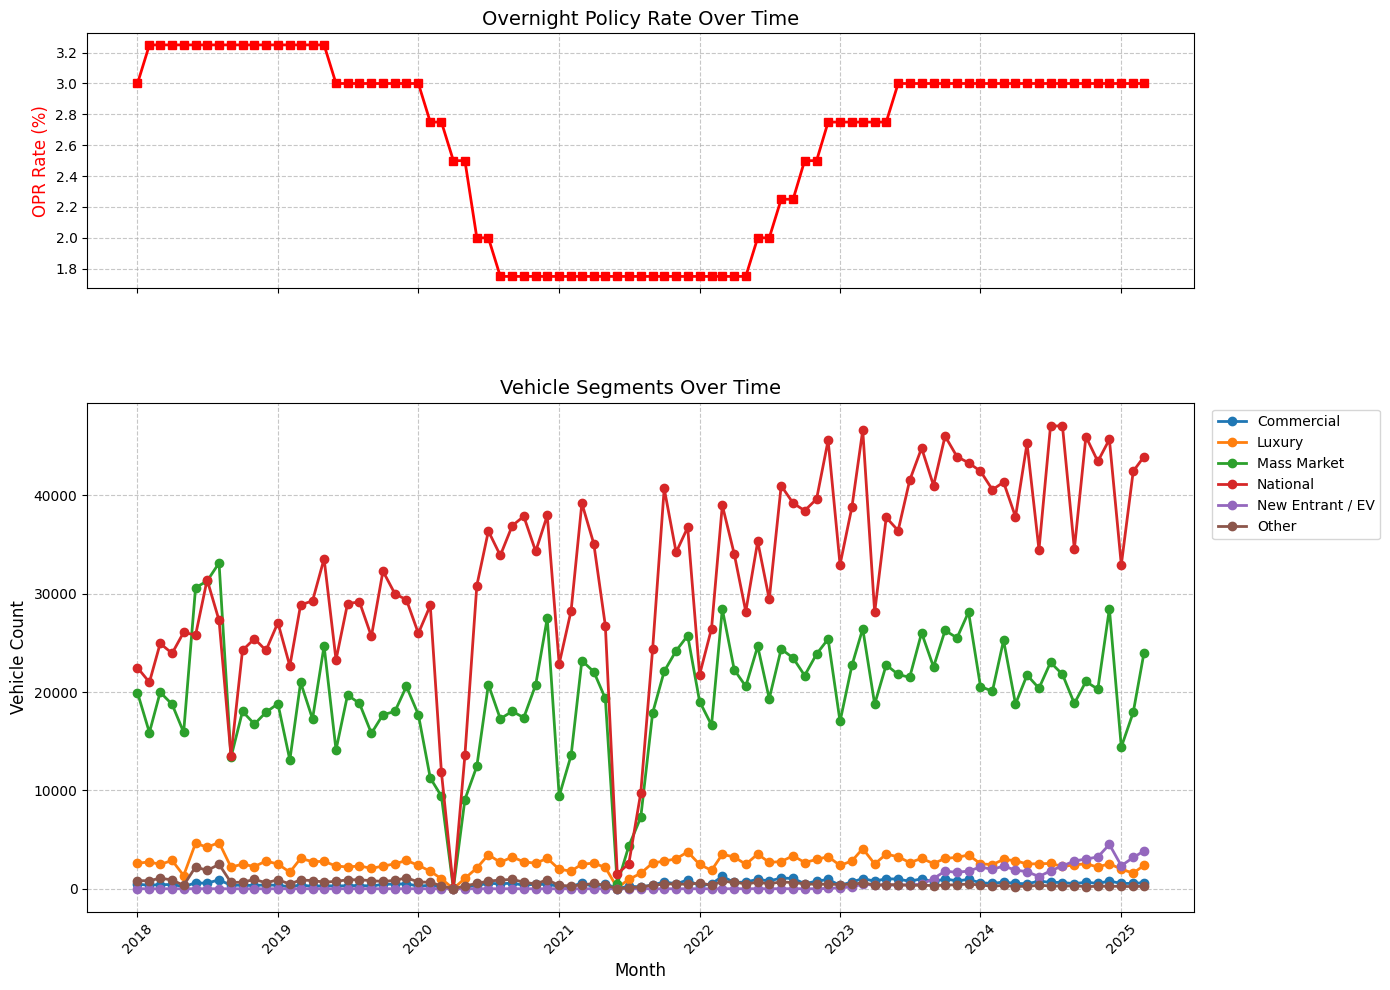

In [18]:
# Convert month to datetime for proper plotting and merging
df_grouped['month_str'] = df_grouped['month'].astype(str)
df_grouped['month_date'] = pd.to_datetime(df_grouped['month_str'])

# Convert macro data date to datetime 
macro_data_df['date'] = pd.to_datetime(macro_data_df['date'])

# Create a pivot table to have segments as columns
pivot_df = df_grouped.pivot_table(index='month_date', columns='Segment', values='count', fill_value=0)

# Merge with OPR data
merged_df = pd.merge_asof(
    pivot_df.reset_index().sort_values('month_date'),
    macro_data_df[['date', 'opr']].sort_values('date'),
    left_on='month_date',
    right_on='date',
    direction='nearest'
)

# Create vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

# Plot OPR on top subplot
ax1.plot(merged_df['month_date'], merged_df['opr'], color='red', linewidth=2, marker='s')
ax1.set_ylabel('OPR Rate (%)', color='red', fontsize=12)
ax1.set_title('Overnight Policy Rate Over Time', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot segment counts on bottom subplot
for segment in pivot_df.columns:
    ax2.plot(merged_df['month_date'], merged_df[segment], marker='o', linewidth=2, label=segment)

ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Vehicle Count', fontsize=12)
ax2.set_title('Vehicle Segments Over Time', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper left', bbox_to_anchor=(1.01, 1.0))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)  # Add some space between the subplots
plt.show()

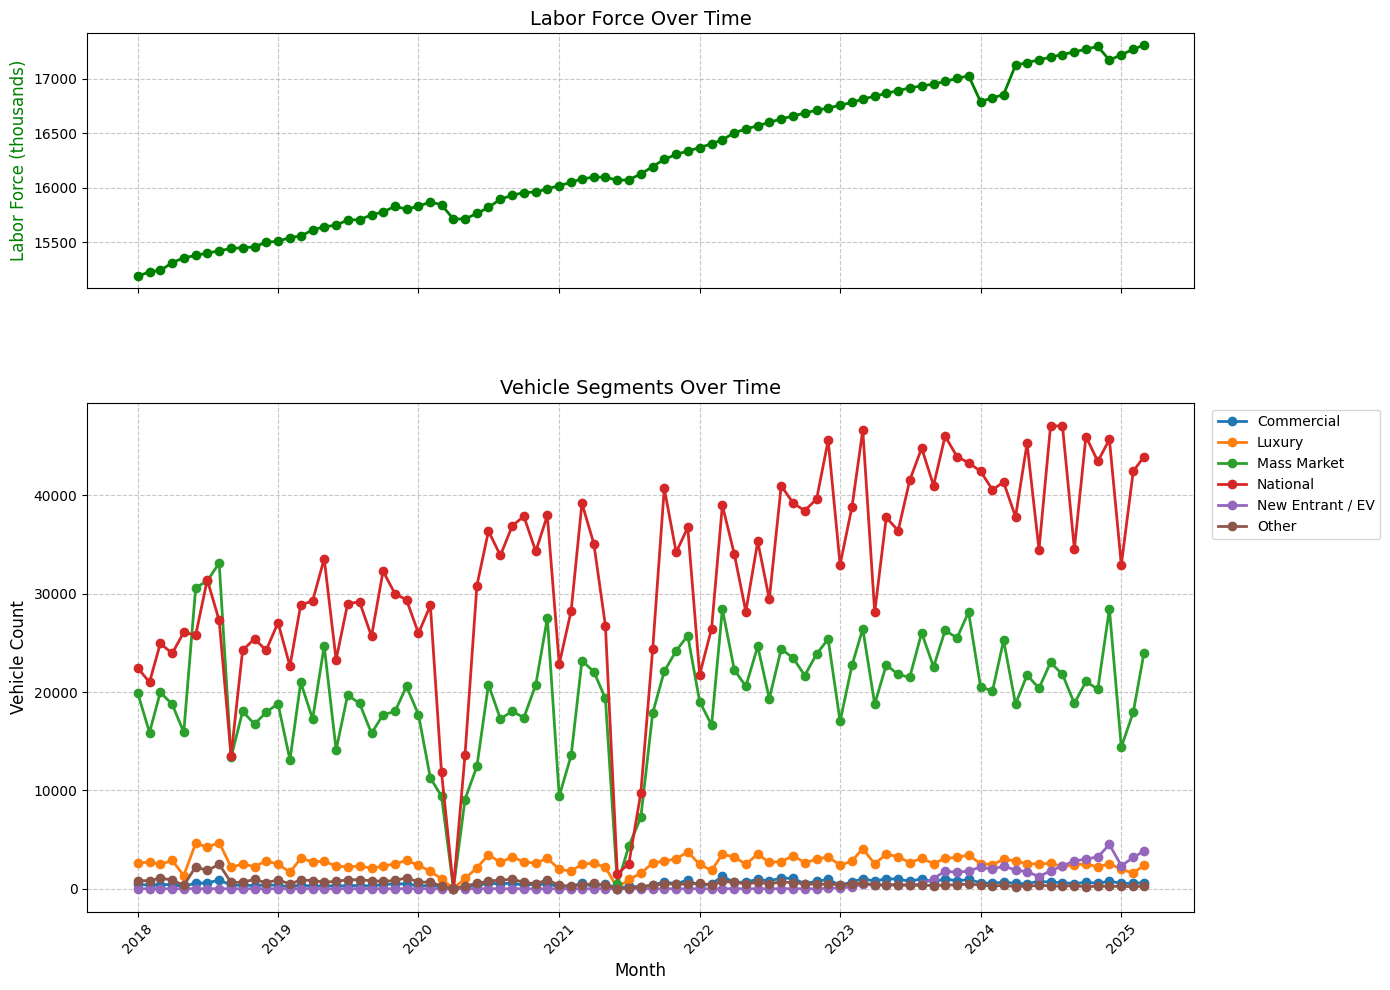

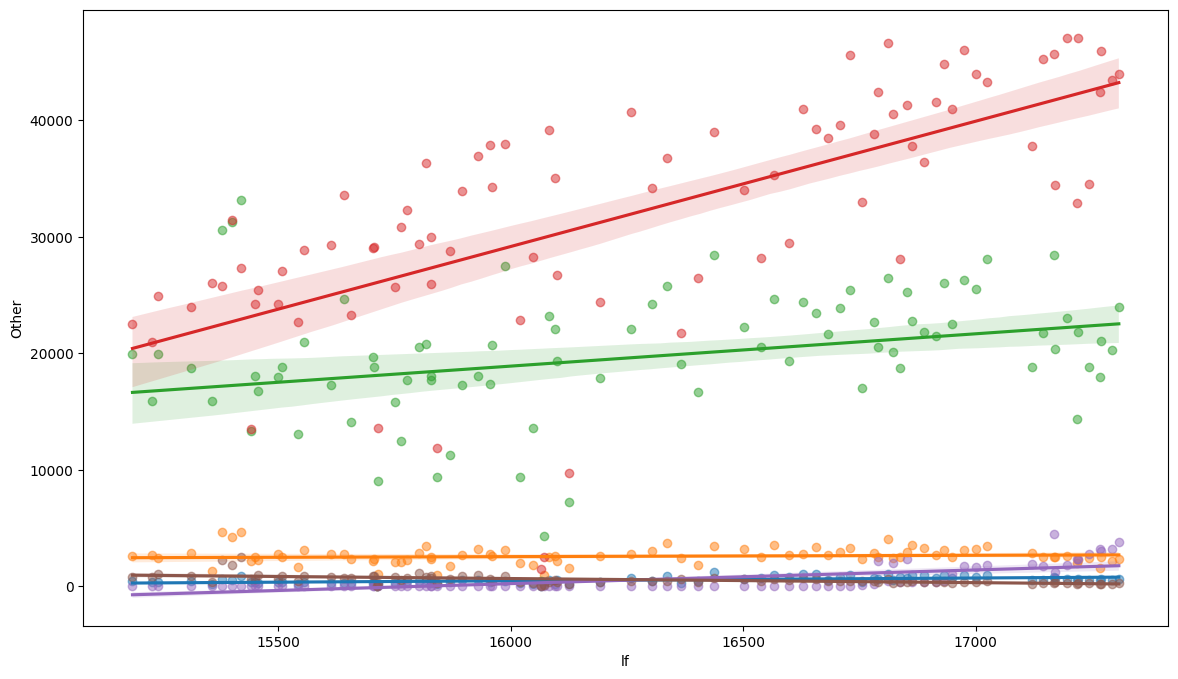

In [19]:
# plot labor force vs segment

# Convert month to datetime for proper plotting and merging
df_grouped['month_str'] = df_grouped['month'].astype(str)
df_grouped['month_date'] = pd.to_datetime(df_grouped['month_str'])

# Convert macro data date to datetime 
macro_data_df['date'] = pd.to_datetime(macro_data_df['date'])

# Create a pivot table to have segments as columns
pivot_df = df_grouped.pivot_table(index='month_date', columns='Segment', values='count', fill_value=0)

# Merge with labor force data
merged_df = pd.merge_asof(
    pivot_df.reset_index().sort_values('month_date'),
    macro_data_df[['date', 'lf']].sort_values('date'),
    left_on='month_date',
    right_on='date',
    direction='nearest'
)

# Create vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

# Plot labor force on top subplot
ax1.plot(merged_df['month_date'], merged_df['lf'], color='green', linewidth=2, marker='o')
ax1.set_ylabel('Labor Force (thousands)', color='green', fontsize=12)
ax1.set_title('Labor Force Over Time', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot segment counts on bottom subplot
for segment in pivot_df.columns:
    ax2.plot(merged_df['month_date'], merged_df[segment], marker='o', linewidth=2, label=segment)

ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Vehicle Count', fontsize=12)
ax2.set_title('Vehicle Segments Over Time', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper left', bbox_to_anchor=(1.01, 1.0))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)  # Add some space between the subplots
plt.show()

# Additional plot: Correlation between labor force and different segments
plt.figure(figsize=(14, 8))
for segment in pivot_df.columns:
    sns.regplot(x=merged_df['lf'], y=merged_df[segment], label=segment, scatter_kws={'alpha':0.5})


<Figure size 1400x800 with 0 Axes>

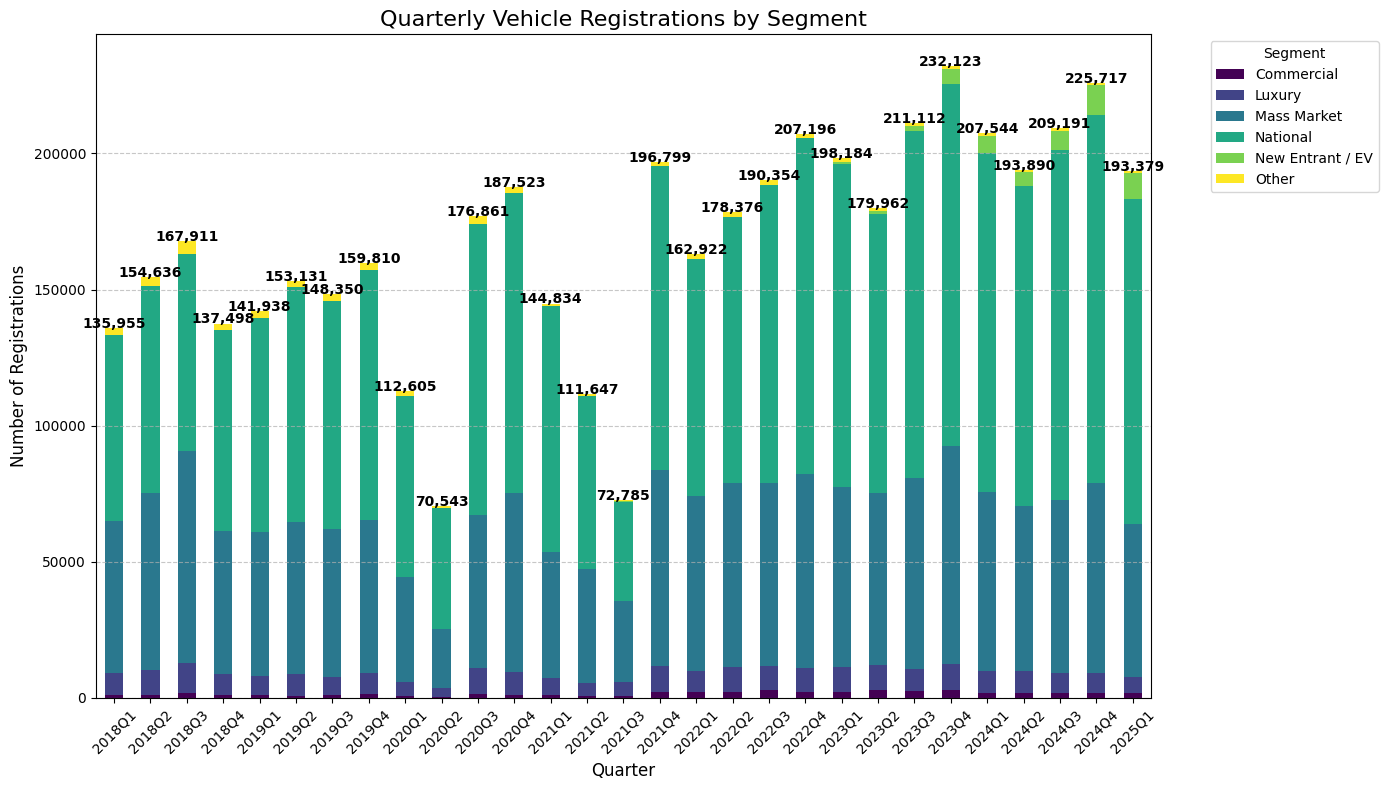

Quarterly Totals by Segment:


Segment,Commercial,Luxury,Mass Market,National,New Entrant / EV,Other
quarter,,,,,,
2018Q1,1230.0,7795.0,55804.0,68410.0,3.0,2713.0
2018Q2,1249.0,8856.0,65277.0,75791.0,1.0,3462.0
2018Q3,1819.0,11123.0,77771.0,72218.0,2.0,4978.0
2018Q4,1092.0,7571.0,52713.0,73896.0,1.0,2225.0
2019Q1,925.0,7276.0,52889.0,78563.0,2.0,2283.0
2019Q2,853.0,7852.0,56077.0,86097.0,2.0,2250.0
2019Q3,925.0,6607.0,54348.0,83821.0,1.0,2648.0
2019Q4,1423.0,7714.0,56297.0,91669.0,3.0,2704.0
2020Q1,815.0,5170.0,38369.0,66603.0,0.0,1648.0


In [28]:
# Prepare the data for plotting
pivot_df_quarterly = df_grouped_quarter.pivot_table(
    index='quarter', 
    columns='Segment', 
    values='count', 
    fill_value=0
)

# Convert quarter period to string for better display
pivot_df_quarterly.index = pivot_df_quarterly.index.astype(str)

# Create a stacked bar chart
plt.figure(figsize=(14, 8))
pivot_df_quarterly.plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8),
    colormap='viridis'
)

# Customize the plot
plt.title('Quarterly Vehicle Registrations by Segment', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Registrations', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add total counts on top of each bar
for i, total in enumerate(pivot_df_quarterly.sum(axis=1)):
    plt.text(i, total + 50, f'{int(total):,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Also display a table with the quarterly totals
print("Quarterly Totals by Segment:")
display(pivot_df_quarterly)

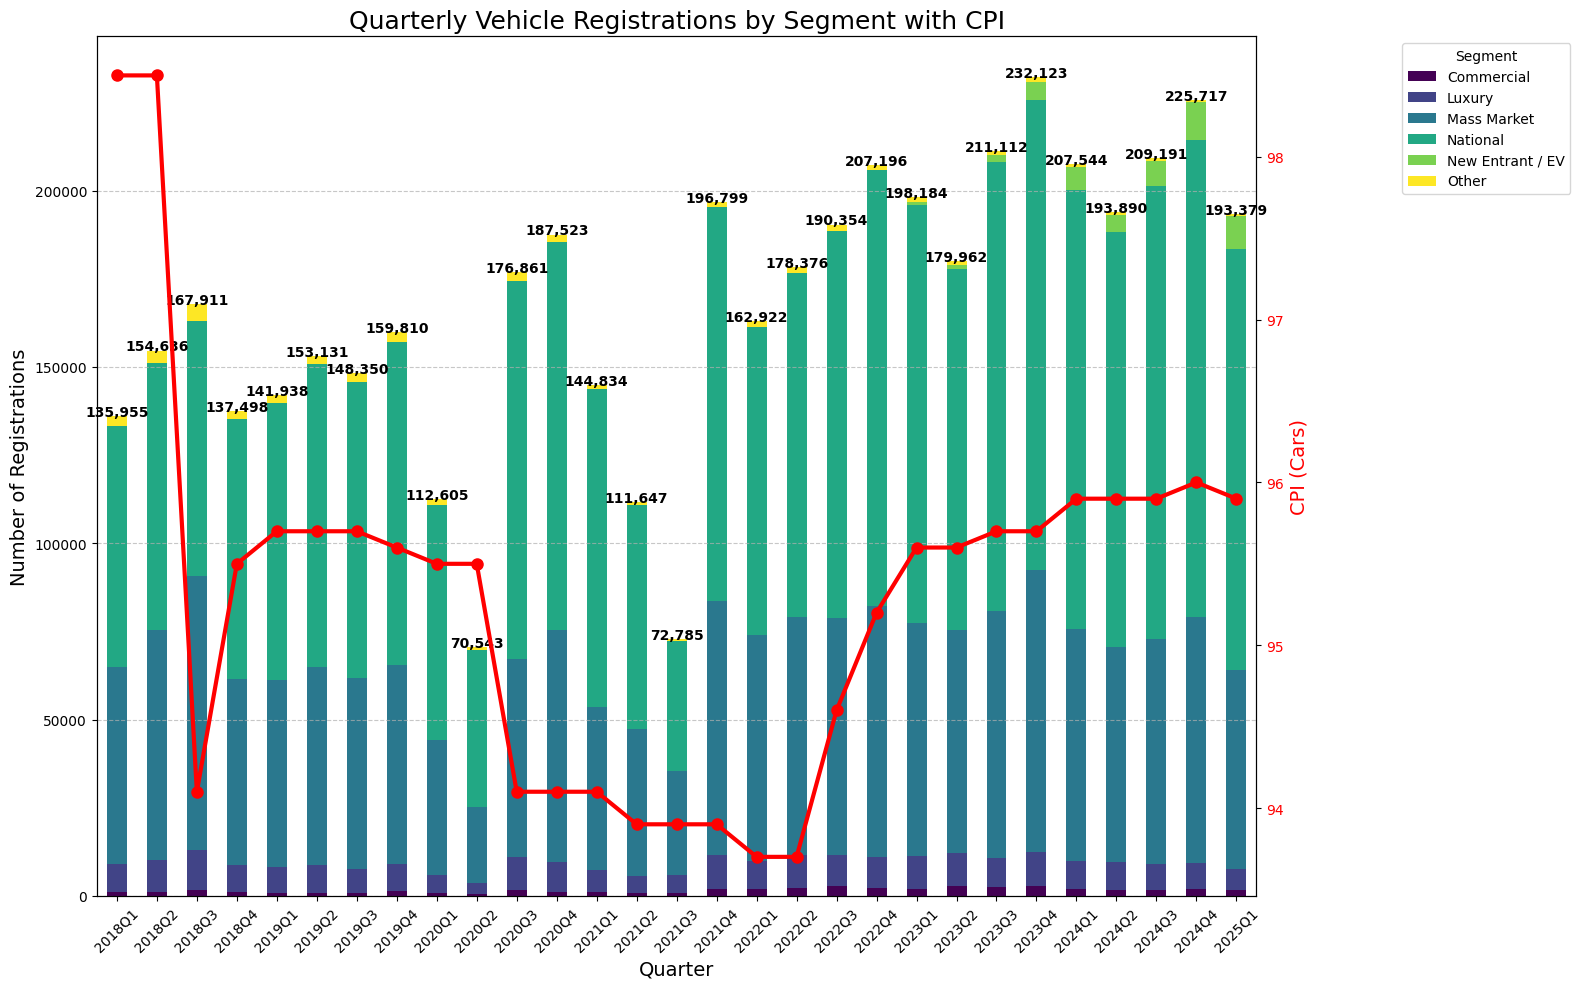

Quarterly Summary with CPI:


Segment,Commercial,Luxury,Mass Market,National,New Entrant / EV,Other,Total,CPI
quarter,,,,,,,,
2018Q1,1230.0,7795.0,55804.0,68410.0,3.0,2713.0,135955.0,98.5
2018Q2,1249.0,8856.0,65277.0,75791.0,1.0,3462.0,154636.0,98.5
2018Q3,1819.0,11123.0,77771.0,72218.0,2.0,4978.0,167911.0,94.1
2018Q4,1092.0,7571.0,52713.0,73896.0,1.0,2225.0,137498.0,95.5
2019Q1,925.0,7276.0,52889.0,78563.0,2.0,2283.0,141938.0,95.7
2019Q2,853.0,7852.0,56077.0,86097.0,2.0,2250.0,153131.0,95.7
2019Q3,925.0,6607.0,54348.0,83821.0,1.0,2648.0,148350.0,95.7
2019Q4,1423.0,7714.0,56297.0,91669.0,3.0,2704.0,159810.0,95.6
2020Q1,815.0,5170.0,38369.0,66603.0,0.0,1648.0,112605.0,95.5


In [29]:
# Prepare the data for plotting
pivot_df_quarterly = df_grouped_quarter.pivot_table(
    index='quarter', 
    columns='Segment', 
    values='count', 
    fill_value=0
)

# Convert quarter period to string for better display
pivot_df_quarterly.index = pivot_df_quarterly.index.astype(str)

# Prepare CPI data for quarterly comparison
# Convert quarter strings to datetime for proper merging
quarterly_dates = pd.to_datetime([f"{q.split('Q')[0]}-{int(q.split('Q')[1])*3-2}-01" for q in pivot_df_quarterly.index])
quarterly_df = pd.DataFrame({'quarter_str': pivot_df_quarterly.index, 'quarter_date': quarterly_dates})

# Merge with CPI data using nearest date
quarterly_cpi = pd.merge_asof(
    quarterly_df.sort_values('quarter_date'),
    macro_data_df[['date', 'cars_cpi']].sort_values('date'),
    left_on='quarter_date',
    right_on='date',
    direction='nearest'
)

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot stacked bar chart on first y-axis
pivot_df_quarterly.plot(
    kind='bar', 
    stacked=True, 
    ax=ax1,
    colormap='viridis'
)

# Customize the first y-axis
ax1.set_title('Quarterly Vehicle Registrations by Segment with CPI', fontsize=18)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Number of Registrations', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create second y-axis for CPI data
ax2 = ax1.twinx()
ax2.plot(range(len(quarterly_cpi)), quarterly_cpi['cars_cpi'], 'r-', marker='o', linewidth=3, markersize=8)
ax2.set_ylabel('CPI (Cars)', color='r', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')

# Add total counts on top of each bar
for i, total in enumerate(pivot_df_quarterly.sum(axis=1)):
    ax1.text(i, total + 50, f'{int(total):,}', ha='center', fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + ['CPI'], 
           title='Segment', bbox_to_anchor=(1.12, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Also display a table with the quarterly totals and CPI
summary_df = pivot_df_quarterly.copy()
summary_df['Total'] = summary_df.sum(axis=1)
summary_df['CPI'] = quarterly_cpi['cars_cpi'].values
print("Quarterly Summary with CPI:")
display(summary_df)

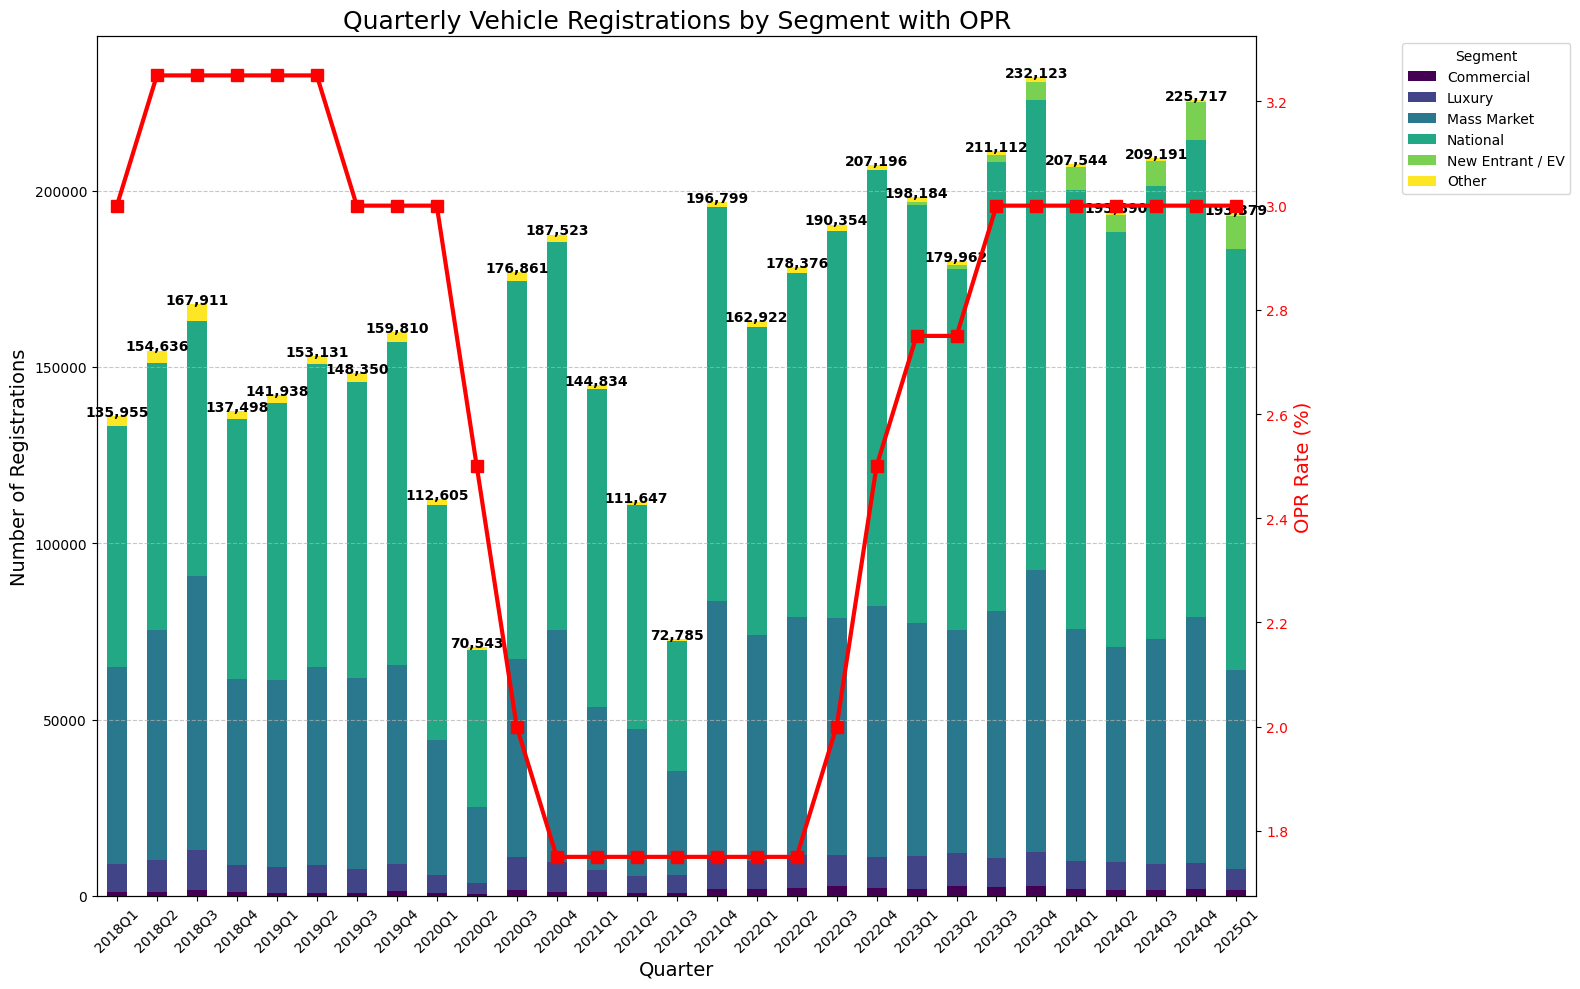

Quarterly Summary with OPR:


Segment,Commercial,Luxury,Mass Market,National,New Entrant / EV,Other,Total,OPR
quarter,,,,,,,,
2018Q1,1230.0,7795.0,55804.0,68410.0,3.0,2713.0,135955.0,3.00
2018Q2,1249.0,8856.0,65277.0,75791.0,1.0,3462.0,154636.0,3.25
2018Q3,1819.0,11123.0,77771.0,72218.0,2.0,4978.0,167911.0,3.25
2018Q4,1092.0,7571.0,52713.0,73896.0,1.0,2225.0,137498.0,3.25
2019Q1,925.0,7276.0,52889.0,78563.0,2.0,2283.0,141938.0,3.25
2019Q2,853.0,7852.0,56077.0,86097.0,2.0,2250.0,153131.0,3.25
2019Q3,925.0,6607.0,54348.0,83821.0,1.0,2648.0,148350.0,3.00
2019Q4,1423.0,7714.0,56297.0,91669.0,3.0,2704.0,159810.0,3.00
2020Q1,815.0,5170.0,38369.0,66603.0,0.0,1648.0,112605.0,3.00


In [30]:
# Prepare the data for plotting
pivot_df_quarterly = df_grouped_quarter.pivot_table(
    index='quarter', 
    columns='Segment', 
    values='count', 
    fill_value=0
)

# Convert quarter period to string for better display
pivot_df_quarterly.index = pivot_df_quarterly.index.astype(str)

# Prepare OPR data for quarterly comparison
# Convert quarter strings to datetime for proper merging
quarterly_dates = pd.to_datetime([f"{q.split('Q')[0]}-{int(q.split('Q')[1])*3-2}-01" for q in pivot_df_quarterly.index])
quarterly_df = pd.DataFrame({'quarter_str': pivot_df_quarterly.index, 'quarter_date': quarterly_dates})

# Merge with OPR data using nearest date
quarterly_opr = pd.merge_asof(
    quarterly_df.sort_values('quarter_date'),
    macro_data_df[['date', 'opr']].sort_values('date'),
    left_on='quarter_date',
    right_on='date',
    direction='nearest'
)

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot stacked bar chart on first y-axis
pivot_df_quarterly.plot(
    kind='bar', 
    stacked=True, 
    ax=ax1,
    colormap='viridis'
)

# Customize the first y-axis
ax1.set_title('Quarterly Vehicle Registrations by Segment with OPR', fontsize=18)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Number of Registrations', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create second y-axis for OPR data
ax2 = ax1.twinx()
ax2.plot(range(len(quarterly_opr)), quarterly_opr['opr'], 'r-', marker='s', linewidth=3, markersize=8)
ax2.set_ylabel('OPR Rate (%)', color='r', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')

# Add total counts on top of each bar
for i, total in enumerate(pivot_df_quarterly.sum(axis=1)):
    ax1.text(i, total + 50, f'{int(total):,}', ha='center', fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + ['OPR'], 
           title='Segment', bbox_to_anchor=(1.12, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Also display a table with the quarterly totals and OPR
summary_df = pivot_df_quarterly.copy()
summary_df['Total'] = summary_df.sum(axis=1)
summary_df['OPR'] = quarterly_opr['opr'].values
print("Quarterly Summary with OPR:")
display(summary_df)

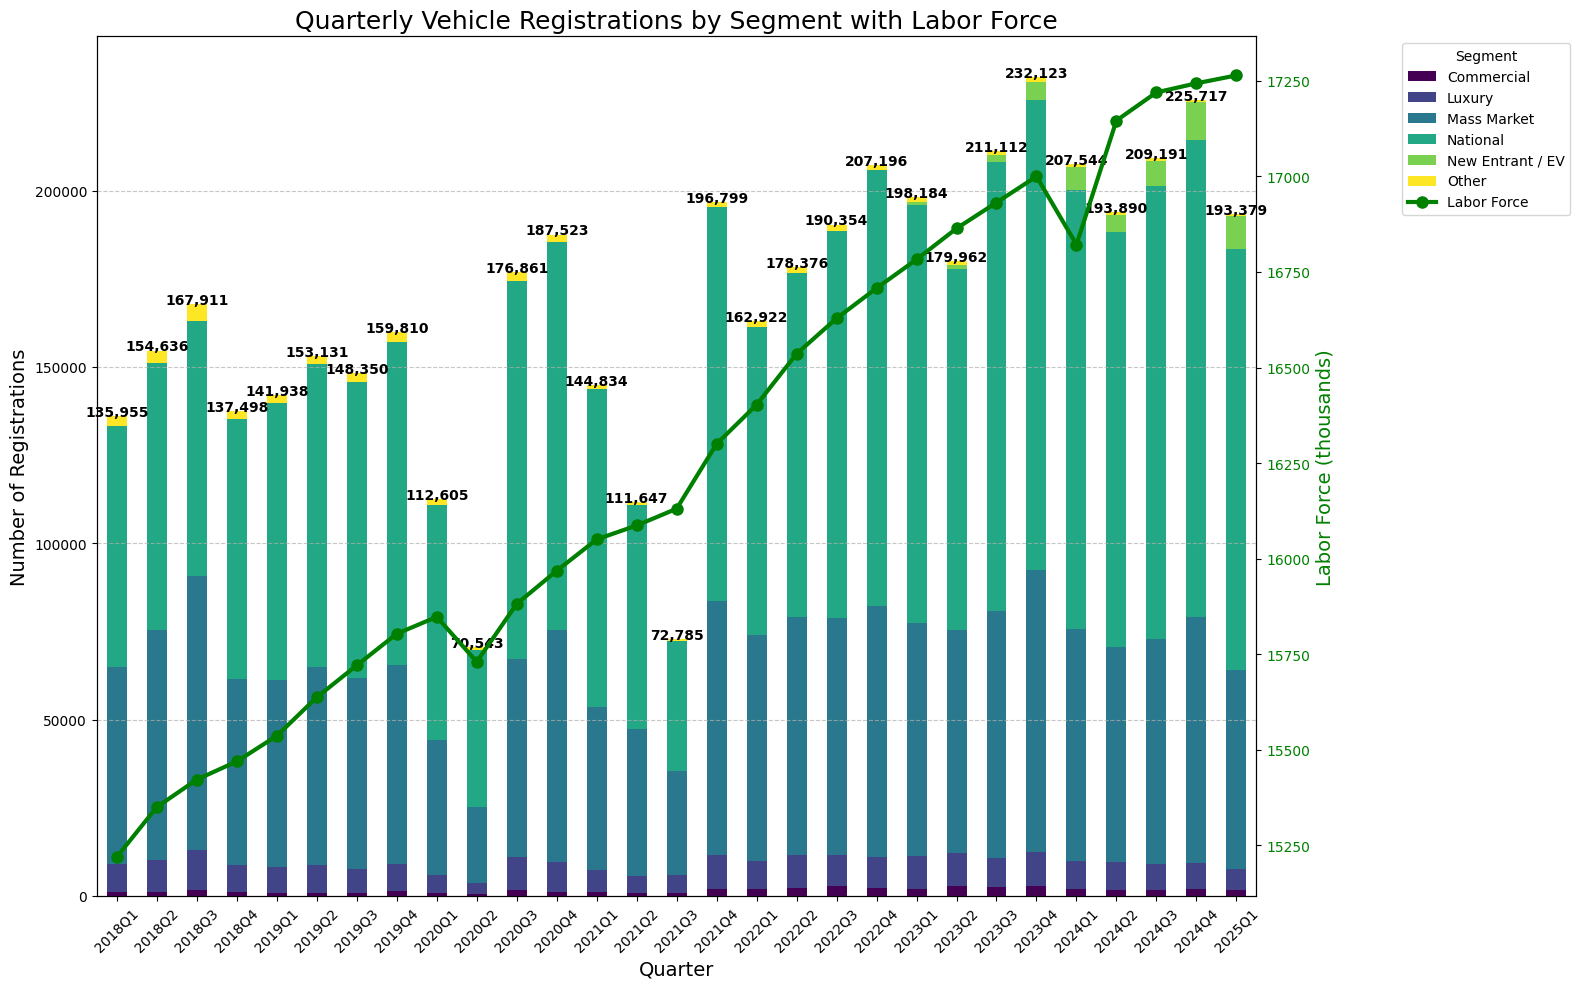

Quarterly Summary with Labor Force Metrics:


Segment,Commercial,Luxury,Mass Market,National,New Entrant / EV,Other,Total,Labor Force,LF Employed,LF Unemployed
quarter,,,,,,,,,,
2018Q1,1230.0,7795.0,55804.0,68410.0,3.0,2713.0,135955.0,15219.400000,14708.166667,511.233333
2018Q2,1249.0,8856.0,65277.0,75791.0,1.0,3462.0,154636.0,15349.866667,14839.633333,510.200000
2018Q3,1819.0,11123.0,77771.0,72218.0,2.0,4978.0,167911.0,15421.766667,14901.800000,520.000000
2018Q4,1092.0,7571.0,52713.0,73896.0,1.0,2225.0,137498.0,15469.200000,14954.800000,514.433333
2019Q1,925.0,7276.0,52889.0,78563.0,2.0,2283.0,141938.0,15536.100000,15018.266667,517.766667
2019Q2,853.0,7852.0,56077.0,86097.0,2.0,2250.0,153131.0,15637.100000,15115.633333,521.500000
2019Q3,925.0,6607.0,54348.0,83821.0,1.0,2648.0,148350.0,15720.600000,15198.500000,522.133333
2019Q4,1423.0,7714.0,56297.0,91669.0,3.0,2704.0,159810.0,15803.200000,15288.866667,514.333333
2020Q1,815.0,5170.0,38369.0,66603.0,0.0,1648.0,112605.0,15847.333333,15298.166667,549.133333


In [ ]:
# Prepare the data for plotting
pivot_df_quarterly = df_grouped_quarter.pivot_table(
    index='quarter', 
    columns='Segment', 
    values='count', 
    fill_value=0
)

# Convert quarter period to string for better display
pivot_df_quarterly.index = pivot_df_quarterly.index.astype(str)

# Instead of using merge_asof, directly merge with the quarterly aggregated labor force data
# First convert quarter to string for consistent merging
macro_data_grouped['quarter_str'] = macro_data_grouped['quarter'].astype(str)

# Now merge the quarterly vehicle data with quarterly labor force data
quarterly_merged = pd.merge(
    pd.DataFrame({'quarter_str': pivot_df_quarterly.index}),
    macro_data_grouped[['quarter_str', 'lf', 'lf_employed', 'lf_unemployed']],
    on='quarter_str',
    how='left'
)

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot stacked bar chart on first y-axis
pivot_df_quarterly.plot(
    kind='bar', 
    stacked=True, 
    ax=ax1,
    colormap='viridis'
)

# Customize the first y-axis
ax1.set_title('Quarterly Vehicle Registrations by Segment with Labor Force', fontsize=18)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Number of Registrations', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create second y-axis for labor force data
ax2 = ax1.twinx()
ax2.plot(range(len(quarterly_merged)), quarterly_merged['lf'], 'g-', marker='o', linewidth=3, markersize=8, label='Labor Force')
ax2.set_ylabel('Labor Force (thousands)', color='g', fontsize=14)
ax2.tick_params(axis='y', labelcolor='g')

# Optional: Plot employed and unemployed as well to show composition
# ax2.plot(range(len(quarterly_merged)), quarterly_merged['lf_employed'], 'b--', alpha=0.7, linewidth=2, markersize=6, label='Employed')
# ax2.plot(range(len(quarterly_merged)), quarterly_merged['lf_unemployed'], 'r--', alpha=0.7, linewidth=2, markersize=6, label='Unemployed')

# Add total counts on top of each bar
for i, total in enumerate(pivot_df_quarterly.sum(axis=1)):
    ax1.text(i, total + 50, f'{int(total):,}', ha='center', fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           title='Segment', bbox_to_anchor=(1.12, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Also display a table with the quarterly totals and labor force metrics
summary_df = pivot_df_quarterly.copy()
summary_df['Total'] = summary_df.sum(axis=1)
summary_df['Labor Force'] = quarterly_merged['lf'].values
summary_df['LF Employemployeded'] = quarterly_merged['lf_employed'].values
summary_df['LF Unemployed'] = quarterly_merged['lf_unemployed'].values
print("Quarterly Summary with Labor Force Metrics:")
display(summary_df)

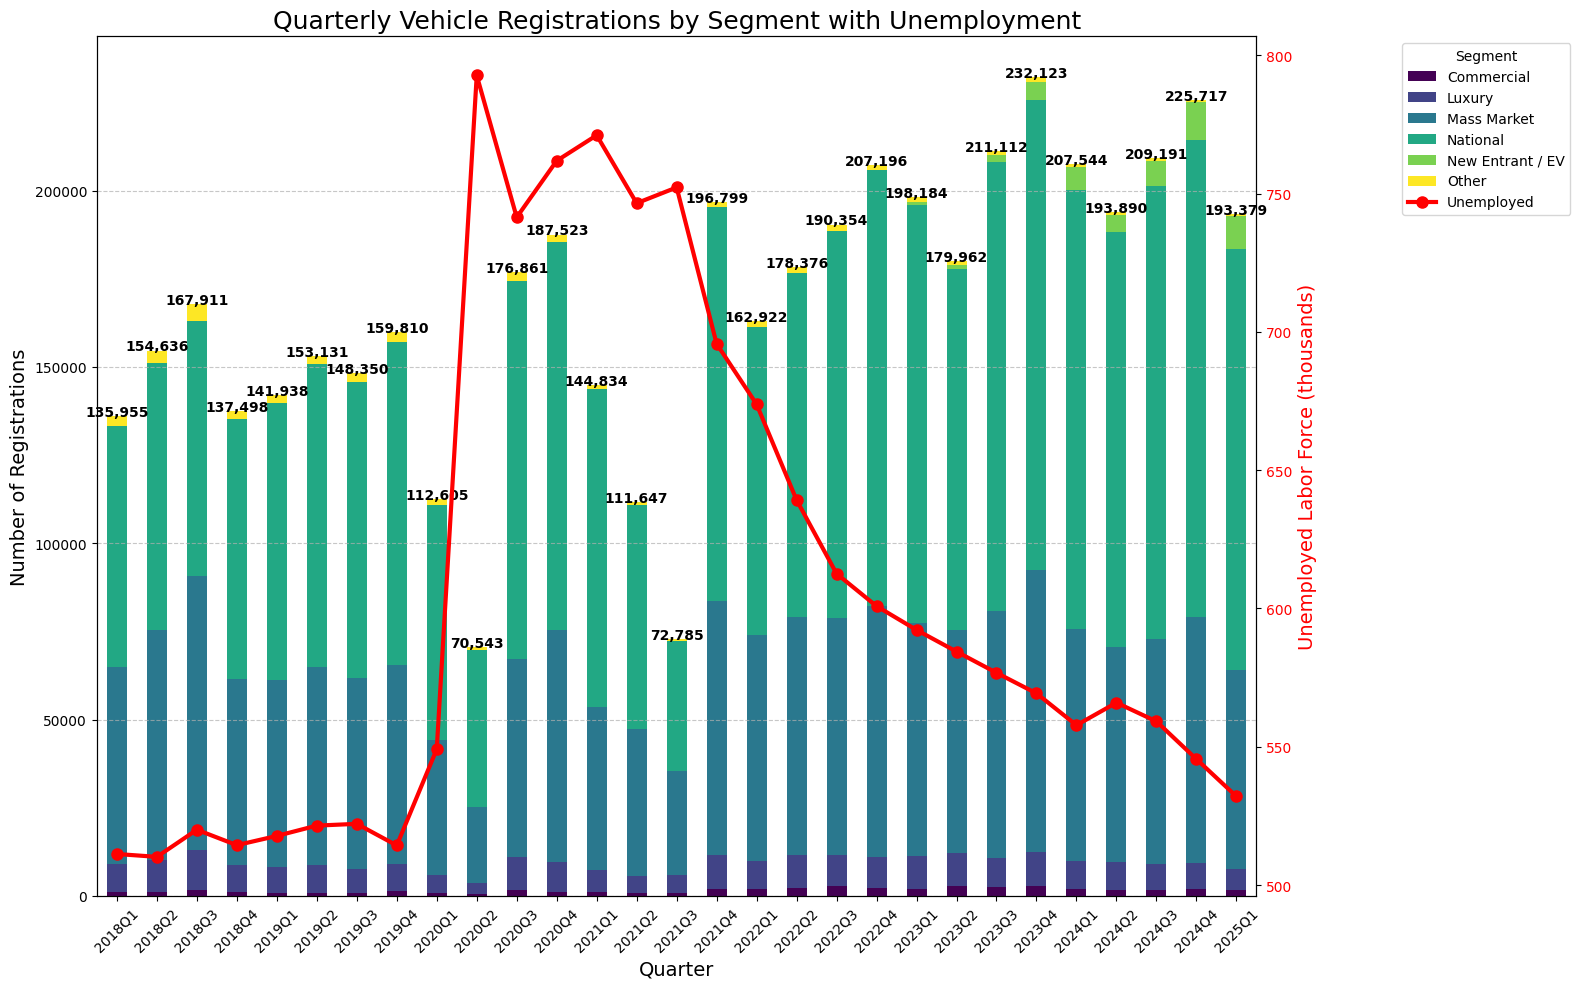

Quarterly Summary with Unemployment Metrics:


Segment,Commercial,Luxury,Mass Market,National,New Entrant / EV,Other,Total,Unemployed
quarter,,,,,,,,
2018Q1,1230.0,7795.0,55804.0,68410.0,3.0,2713.0,135955.0,511.233333
2018Q2,1249.0,8856.0,65277.0,75791.0,1.0,3462.0,154636.0,510.200000
2018Q3,1819.0,11123.0,77771.0,72218.0,2.0,4978.0,167911.0,520.000000
2018Q4,1092.0,7571.0,52713.0,73896.0,1.0,2225.0,137498.0,514.433333
2019Q1,925.0,7276.0,52889.0,78563.0,2.0,2283.0,141938.0,517.766667
2019Q2,853.0,7852.0,56077.0,86097.0,2.0,2250.0,153131.0,521.500000
2019Q3,925.0,6607.0,54348.0,83821.0,1.0,2648.0,148350.0,522.133333
2019Q4,1423.0,7714.0,56297.0,91669.0,3.0,2704.0,159810.0,514.333333
2020Q1,815.0,5170.0,38369.0,66603.0,0.0,1648.0,112605.0,549.133333


In [35]:
# Prepare the data for plotting
pivot_df_quarterly = df_grouped_quarter.pivot_table(
    index='quarter', 
    columns='Segment', 
    values='count', 
    fill_value=0
)

# Convert quarter period to string for better display
pivot_df_quarterly.index = pivot_df_quarterly.index.astype(str)

# Instead of using merge_asof, directly merge with the quarterly aggregated labor force data
# First convert quarter to string for consistent merging
macro_data_grouped['quarter_str'] = macro_data_grouped['quarter'].astype(str)

# Now merge the quarterly vehicle data with quarterly labor force data
quarterly_merged = pd.merge(
    pd.DataFrame({'quarter_str': pivot_df_quarterly.index}),
    macro_data_grouped[['quarter_str', 'lf', 'lf_employed', 'lf_unemployed']],
    on='quarter_str',
    how='left'
)

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot stacked bar chart on first y-axis
pivot_df_quarterly.plot(
    kind='bar', 
    stacked=True, 
    ax=ax1,
    colormap='viridis'
)

# Customize the first y-axis
ax1.set_title('Quarterly Vehicle Registrations by Segment with Unemployment', fontsize=18)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Number of Registrations', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create second y-axis for unemployment data
ax2 = ax1.twinx()
ax2.plot(range(len(quarterly_merged)), quarterly_merged['lf_unemployed'], 'r-', marker='o', linewidth=3, markersize=8, label='Unemployed')
ax2.set_ylabel('Unemployed Labor Force (thousands)', color='r', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')

# Add total counts on top of each bar
for i, total in enumerate(pivot_df_quarterly.sum(axis=1)):
    ax1.text(i, total + 50, f'{int(total):,}', ha='center', fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           title='Segment', bbox_to_anchor=(1.12, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Also display a table with the quarterly totals and unemployment metrics
summary_df = pivot_df_quarterly.copy()
summary_df['Total'] = summary_df.sum(axis=1)
summary_df['Unemployed'] = quarterly_merged['lf_unemployed'].values
print("Quarterly Summary with Unemployment Metrics:")
display(summary_df)

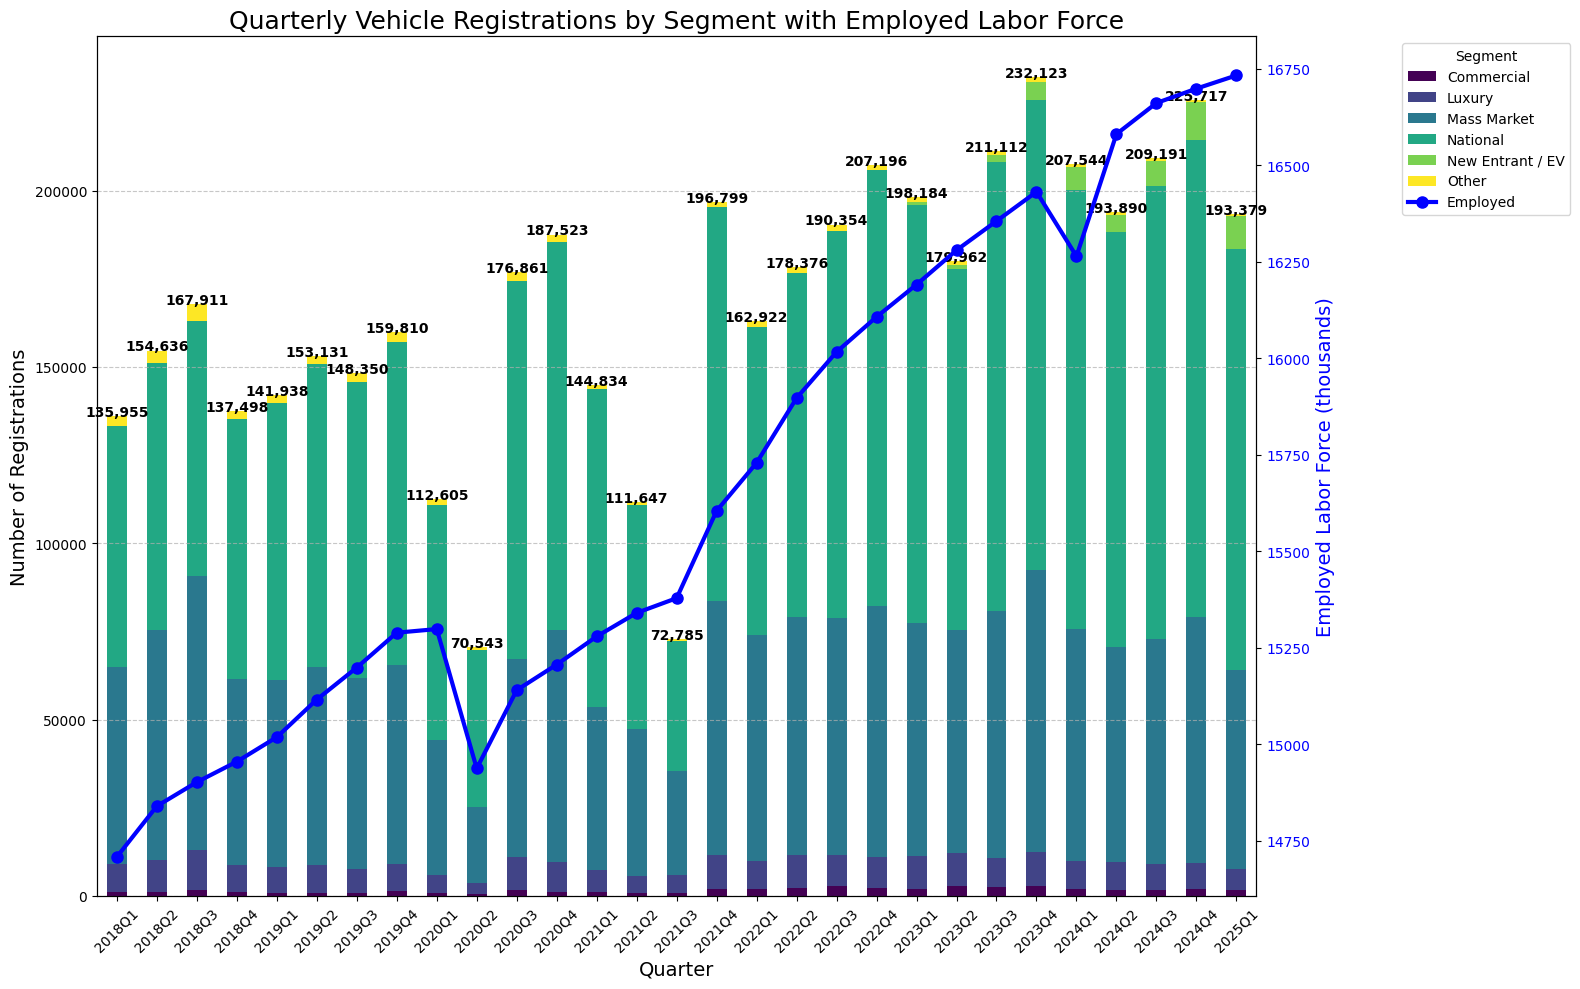

Quarterly Summary with Employment Metrics:


Segment,Commercial,Luxury,Mass Market,National,New Entrant / EV,Other,Total,Employed
quarter,,,,,,,,
2018Q1,1230.0,7795.0,55804.0,68410.0,3.0,2713.0,135955.0,14708.166667
2018Q2,1249.0,8856.0,65277.0,75791.0,1.0,3462.0,154636.0,14839.633333
2018Q3,1819.0,11123.0,77771.0,72218.0,2.0,4978.0,167911.0,14901.800000
2018Q4,1092.0,7571.0,52713.0,73896.0,1.0,2225.0,137498.0,14954.800000
2019Q1,925.0,7276.0,52889.0,78563.0,2.0,2283.0,141938.0,15018.266667
2019Q2,853.0,7852.0,56077.0,86097.0,2.0,2250.0,153131.0,15115.633333
2019Q3,925.0,6607.0,54348.0,83821.0,1.0,2648.0,148350.0,15198.500000
2019Q4,1423.0,7714.0,56297.0,91669.0,3.0,2704.0,159810.0,15288.866667
2020Q1,815.0,5170.0,38369.0,66603.0,0.0,1648.0,112605.0,15298.166667


In [36]:
# Prepare the data for plotting
pivot_df_quarterly = df_grouped_quarter.pivot_table(
    index='quarter', 
    columns='Segment', 
    values='count', 
    fill_value=0
)

# Convert quarter period to string for better display
pivot_df_quarterly.index = pivot_df_quarterly.index.astype(str)

# Instead of using merge_asof, directly merge with the quarterly aggregated labor force data
# First convert quarter to string for consistent merging
macro_data_grouped['quarter_str'] = macro_data_grouped['quarter'].astype(str)

# Now merge the quarterly vehicle data with quarterly labor force data
quarterly_merged = pd.merge(
    pd.DataFrame({'quarter_str': pivot_df_quarterly.index}),
    macro_data_grouped[['quarter_str', 'lf', 'lf_employed', 'lf_unemployed']],
    on='quarter_str',
    how='left'
)

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot stacked bar chart on first y-axis
pivot_df_quarterly.plot(
    kind='bar', 
    stacked=True, 
    ax=ax1,
    colormap='viridis'
)

# Customize the first y-axis
ax1.set_title('Quarterly Vehicle Registrations by Segment with Employed Labor Force', fontsize=18)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Number of Registrations', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create second y-axis for employed labor force data
ax2 = ax1.twinx()
ax2.plot(range(len(quarterly_merged)), quarterly_merged['lf_employed'], 'b-', marker='o', linewidth=3, markersize=8, label='Employed')
ax2.set_ylabel('Employed Labor Force (thousands)', color='b', fontsize=14)
ax2.tick_params(axis='y', labelcolor='b')

# Add total counts on top of each bar
for i, total in enumerate(pivot_df_quarterly.sum(axis=1)):
    ax1.text(i, total + 50, f'{int(total):,}', ha='center', fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           title='Segment', bbox_to_anchor=(1.12, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Also display a table with the quarterly totals and employment metrics
summary_df = pivot_df_quarterly.copy()
summary_df['Total'] = summary_df.sum(axis=1)
summary_df['Employed'] = quarterly_merged['lf_employed'].values
print("Quarterly Summary with Employment Metrics:")
display(summary_df)